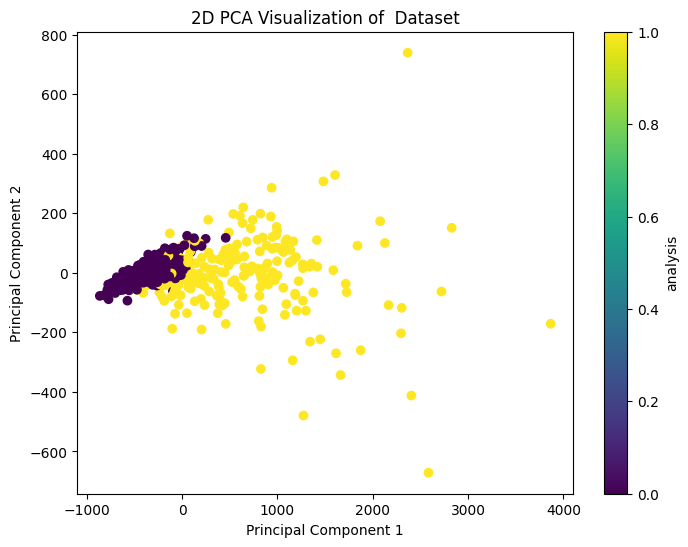

SVM with linear kernel - Accuracy: 0.96
SVM with rbf kernel - Accuracy: 0.95
SVM with poly kernel - Accuracy: 0.95

Explanation of Kernel Effect:

Linear Kernel: imagines a linear decision boundary, suitable when data is linearly separable. It maximizes the margin between classes using a hyperplane,it performs well if the data is linearly separable.
RBF (Radial Basis Function) Kernel: Maps data to a higher-dimensional space using a Gaussian function, handling non-linear relationships. It’s effective for complex data but sensitive to parameteric conditions.
Polynomial Kernel: Uses polynomial terms to map non-linear patterns in higher dimensions. Its degree (default 3) affects flexibility—higher degrees fit complex data but may overfit.
conclusion:
The kernel choice impacts accuracy based on data complexity; linear works for simple separations, while RBF and polynomial are better with non-linear patterns.



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('/content/breast-cancer.csv')
data['diagnosis'] = data['diagnosis'].map({'M': 'harmful', 'B': 'not harmful'})
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for 2D plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizing  data in 2D PCA space
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.map({'not harmful': 0, 'harmful': 1}), cmap='viridis')
plt.colorbar(scatter, label='analysis')
plt.title('2D PCA Visualization of  Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Training SVM with different kernels
kernels = ['linear', 'rbf', 'poly']
models = {}
accuracies = {}

for kernel in kernels:
    # Initialize and train SVM model
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train.map({'not harmful': 0, 'harmful': 1}))

    # Predicting and calculating accuracy
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test.map({'not harmful': 0, 'harmful': 1}), y_pred)
    models[kernel] = svm_model
    accuracies[kernel] = acc
    print(f"SVM with {kernel} kernel - Accuracy: {acc:.2f}")

# Explanation of Kernel Effect
print("\nExplanation of Kernel Effect:")
print("""
Linear Kernel: imagines a linear decision boundary, suitable when data is linearly separable. It maximizes the margin between classes using a hyperplane,it performs well if the data is linearly separable.
RBF (Radial Basis Function) Kernel: Maps data to a higher-dimensional space using a Gaussian function, handling non-linear relationships. It’s effective for complex data but sensitive to parameteric conditions.
Polynomial Kernel: Uses polynomial terms to map non-linear patterns in higher dimensions. Its degree (default 3) affects flexibility—higher degrees fit complex data but may overfit.
conclusion:
The kernel choice impacts accuracy based on data complexity; linear works for simple separations, while RBF and polynomial are better with non-linear patterns.
""")